## A simple example of how to use a spectral energy distribution (SED) computed by ATM
## to generate and plot a simulated SPHEREx spectrum of an asteroid.
### For more details, questions and comments, please send email to Zeljko Ivezic at ivezic@uw.edu

In [1]:
import os 
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
%matplotlib inline

In [2]:
## automatically reload any modules read below that might have changed (e.g. plots)
%load_ext autoreload
%autoreload 2
# importing tools: 
import analysisTools as at
import plottingTools as pt

### Set local directory structure (really, only RootDir need be changed to where this notebook is)

In [3]:
RootDIR = './' # the parent directory where "everything" is 
dataDIR = RootDIR + 'data/'            # subdirectory with reflectivity curves (Bus-DeMeo taxonomy)
ATMDIR = dataDIR + "ATMmodels/"       # subdirectory with ATM SEDs
BrendanDIR = dataDIR + "BrendanSims/"  # time-wavelength SPHEREx simulation data from Brendan Crill
outputDIR = RootDIR + 'output/'          # all plots go there

## First, let's plot noiseless ATM SEDs...

In [4]:
# stats with pre-computed ATM models 
STATS_FILE = dataDIR + "ATMmodelStats.dat"

### show the ATM model stats (only these eps/T1/r values can be selected further below)

In [5]:
col_names = ['eps', 'T1', 'r', 'fluxRat', 'waveMin', 'fluxMin', 'flux0']
df = Table.read(STATS_FILE, format='ascii', names=col_names)
df

eps,T1,r,fluxRat,waveMin,fluxMin,flux0
float64,int64,float64,float64,float64,float64,float64
0.98,380,1.1,1.383,2.524e-06,0.0441,3.857e-10
0.98,380,1.2,1.067,2.611e-06,0.0387,1.976e-10
0.98,380,1.3,0.8311,2.698e-06,0.0342,1.262e-10
0.98,380,1.4,0.6522,2.785e-06,0.0304,8.832e-11
0.98,380,1.5,0.5153,2.872e-06,0.0273,6.508e-11
0.98,380,1.6,0.4095,2.959e-06,0.0246,4.966e-11
0.98,380,1.7,0.3274,3.045e-06,0.0223,3.887e-11
0.98,380,1.8,0.2631,3.132e-06,0.0204,3.103e-11
0.98,380,1.9,0.2125,3.219e-06,0.0187,2.518e-11


### and now plot a few ATM SEDs (reproduce Fig. 1 from the paper) 

In [6]:
wave = {}
flux = {}
eps = {}
alb = {}
SEDfiles = {}
labels = {}
SEDfiles[0] = 'SED_E0.98_T400_r2.0.dat'
SEDfiles[1] = 'SED_E0.90_T400_r2.0.dat'
SEDfiles[2] = 'SED_E0.98_T400_r3.0.dat'
SEDfiles[3] = 'SED_E0.90_T400_r3.0.dat'
for i in range(0,4):
    SEDfile = ATMDIR + SEDfiles[i]
    wave[i], flux[i], eps[i], alb[i] = at.getSED(SEDfile)
    
labels[0] = "2.0 0.98 0.05 10 400"
labels[1] = "2.0 0.90 0.25 10 400"
labels[2] = "3.0 0.98 0.05 10 400"
labels[3] = "3.0 0.90 0.25 10 400"

lineWidths = [1, 1, 2, 2, 2]
lineColors = ['b', 'r', 'b', 'r', 'g']
lineStyles = ['solid', 'solid', 'dashed', 'dashed', 'dashed']

plotName = outputDIR + 'SPHERExFigure1a.png'

saved plot as: ./output/SPHERExFigure1a.png


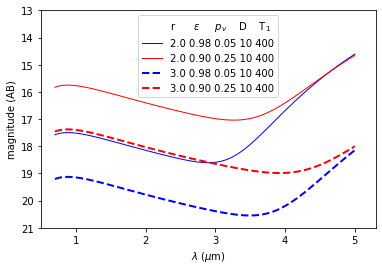

In [7]:
pt.plotSEDs(wave, flux, labels, lineStyles, lineColors, lineWidths, plotName, yMin=21, yMax=13)

In [8]:
### and now the right panel
wave = {}
flux = {}
eps = {}
alb = {}
SEDfiles = {}
labels = {}
SEDfiles[0] = 'SED_E0.98_T400_r2.0.dat'
SEDfiles[1] = 'SED_E0.98_T380_r2.0.dat'
SEDfiles[2] = 'SED_E0.98_T420_r2.0.dat' 
for i in range(0,3):
    SEDfile = ATMDIR + SEDfiles[i]
    wave[i], flux[i], eps[i], alb[i] = at.getSED(SEDfile)
    
labels[0] = "2.0 0.98 0.05 10 400"
labels[1] = "2.0 0.98 0.05 10 380"
labels[2] = "2.0 0.98 0.05 10 420" 

lineWidths = [1, 1, 1]
lineColors = ['b', 'g', 'r']
lineStyles = ['solid', 'solid','solid']

plotNameB = outputDIR + 'SPHERExFigure1b.png'

saved plot as: ./output/SPHERExFigure1b.png


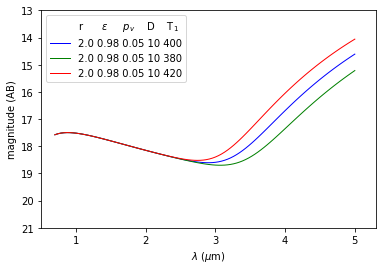

In [9]:
pt.plotSEDs(wave, flux, labels, lineStyles, lineColors, lineWidths, plotNameB, yMin=21, yMax=13)

## Now try the more complex case of simulating SPHEREx spectra (Fig. 9 from the paper)

In [10]:
## taxonomic types, heliocentric radii and albedos are hard-coded below
## however, the SNR at 2.4 micron can be varied (as well as plotting limits)
## see below for an example call
def showSEDexamples(dD, mD, plotName, SNR=5, ABmin = 17, ABmax = 21):
    
    Dfac = np.sqrt(SNR/5)
    
    ## input choices for heliocentric radii and albedos
    rS, pS = 2.4, 0.25
    rC, pC = 3.2, 0.06
    rT, pT = 5.2, 0.05
    
    ## ATM model choices and corresponding labels printed in panels
    # S
    fNameS = 'SED_E0.90_T400_r'
    wavS, magTrueS, magObsS, mErrS = at.getSEDwithNoise(dD, mD, Dfac*5,rS,fNameS,'S')
    labelS1 = 'S type, p$_V$=0.25'
    labelS2 = 'r=2.4 a.u., D=5 km'

    # V
    wavV, magTrueV, magObsV, mErrV = at.getSEDwithNoise(dD, mD, Dfac*5,rS,fNameS,'V')
    labelV1 = 'V type, p$_V$=0.25'
    labelV2 = 'r=2.4 a.u., D=5 km'

    # C 
    fNameC = 'SED_E0.98_T400_r'
    wavC, magTrueC, magObsC, mErrC = at.getSEDwithNoise(dD, mD, Dfac*20,rC,fNameC,'C')
    labelC1 = 'C type, p$_V$=0.06'
    labelC2 = 'r=3.2 a.u., D=20 km'

    # red Trojans
    fNameT = 'SED_E0.94_T400_r'
    wavT, magTrueT, magObsT, mErrT = at.getSEDwithNoise(dD, mD, Dfac*25,rT,fNameT,'RT')
    labelT1 = 'red Trojan, p$_V$=0.05'
    labelT2 = 'r=5.2 a.u., D=25 km'

    
    def doPanel(i, j, fig, text1, text2, wav, magTrue, magObs, mErr, ABmin, ABmax):
        ax = fig.add_subplot(2, 2, 2 * j + 1 + i)   
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1000))
        if (j<1):
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.xaxis.set_major_locator(plt.FixedLocator([1, 2, 3, 4, 5]))
            ax.set_xlabel('$\lambda$ ($\mu$m)', fontsize=15) 
        if (i!=0):
            ax.yaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.yaxis.set_major_locator(plt.FixedLocator([21, 20, 19, 18, 17, 16, 15, 14]))
            ax.set_ylabel('AB magnitude', fontsize=15)
                        
        # plotting        
        ax.plot(wav, magTrue, lw = 3, c='r')
        ax.errorbar(wav, magObs, mErr, fmt='.k', lw=2, ecolor='gray')
        ax.set_xlim(0.5, 5.3)
        ax.set_ylim(ABmax, ABmin)
        ax.text(0.8, 20.1, text1, fontsize=14)
        ax.text(0.8, 20.6, text2, fontsize=14)
        return
 
        
    ## actual plotting
    fig = plt.figure(figsize=(12, 9))
    fig.subplots_adjust(left=0.15, right=0.95, wspace=0.05,
                    bottom=0.2, top=0.95, hspace=0.05)
        
    doPanel(0, 0, fig, labelS1, labelS2, wavS, magTrueS, magObsS, mErrS, ABmin, ABmax)
    doPanel(0, 1, fig, labelV1, labelV2, wavV, magTrueV, magObsV, mErrV, ABmin, ABmax)
    doPanel(1, 0, fig, labelC1, labelC2, wavC, magTrueC, magObsC, mErrC, ABmin, ABmax)
    doPanel(1, 1, fig, labelT1, labelT2, wavT, magTrueT, magObsT, mErrT, ABmin, ABmax)
        
    plt.savefig(plotName)
    plt.show()
    print('saved plot as:', plotName)   

    return

### SEDs with SPHEREx photometric noise added, but NO noise due to asteroid variability

read in ./data//reflectivityS.dat
read in ./data//reflectivityV.dat
read in ./data//reflectivityC.dat
read in ./data//reflectivityRT.dat


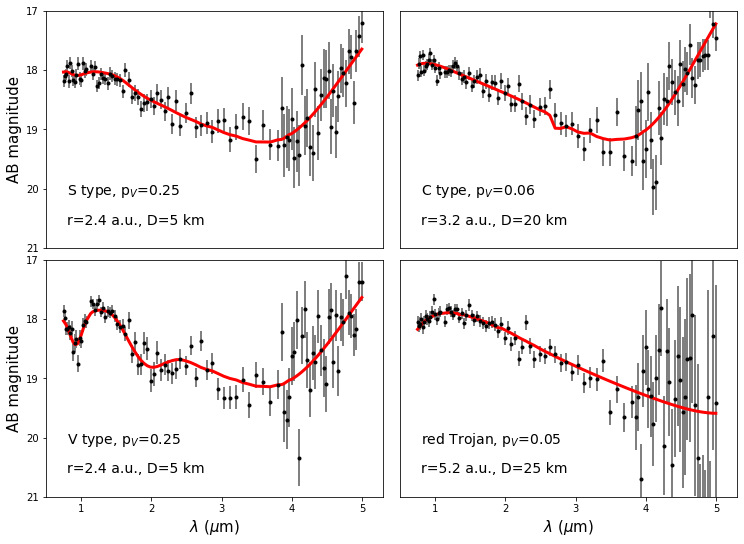

saved plot as: ./output/SPHERExFigure9.png


In [11]:
plotName = outputDIR + 'SPHERExFigure9.png'
showSEDexamples(dataDIR, ATMDIR, plotName, SNR=5, ABmin = 17, ABmax = 21)

### and finally show an end-to-end example that also includes rotational variability

In [12]:
## choose what to model (the top left panel in Fig. 9 above)
name = 'Vedrana' # a totally randomly selected object
# other options: 55P-Tempel-Tuttle, Chaos, Hilda, Hungaria, Odysseus, Phaethon (see Sec2.5 in the paper)
# supported taxonomic choices (see Fig. 4 in the paper)
taxonomy = ['S', 'C', 'V', 'Flat', 'RT', 'LT'] 
tax = taxonomy[0]
Dast = 5.0  # diameter in km
rAU = 2.4   # heliocentric distance in a.u. 
outfilerootname = outputDIR + name + '_Stype_D5km_r2.4AU'
obsFile = BrendanDIR + name + '_out.dat'                    # simulated SPHEREx observations
SEDfile = ATMDIR + 'SED_E0.90_T400_r' + str(rAU) + '.dat'   # ATM model 
# light-curve parameters (sinusoidal LC)
LC={}; 
LC['mjd0'] = 60000   # arbitrary mjd for phase=0
LC['Ampl'] = 0.3     # amplitude (mag)
LC['Period'] = 0.2     # period in days 
LC['sysErr'] = 0.01  # additional systematic photometric error for asteroids

read in ./data//reflectivityS.dat
No. of observations: 408
Season 0


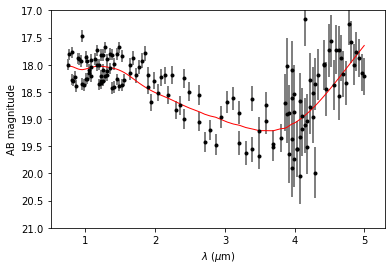

Season 1


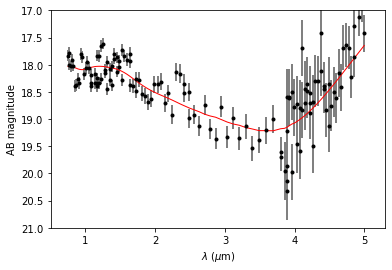

Season 2


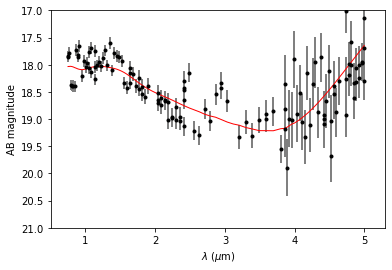

produced plots (shown above):
   ./output/Vedrana_Stype_D5km_r2.4AU_rawSED_Season0.png
   ./output/Vedrana_Stype_D5km_r2.4AU_rawSED_Season1.png
   ./output/Vedrana_Stype_D5km_r2.4AU_rawSED_Season2.png
 and corresponding data files that have extension dat instead of png
 
 Each data file lists, for a single SPHEREx season, the following quantities:
 MJD wavelength magSPHEREx magUncertainty varOffset randomNoise
 the last two entries are added for convenience:
 the input noiseless model can be obtained as magTrue = mag - varOffset - randomNoise


In [13]:
## call the workhorse 
import analysisTools as at
import plottingTools as pt
# the plotting range
ABrange = [17.0, 21.0]
at.simSPHERExSpec(Dast, rAU, SEDfile, dataDIR, tax, LC, obsFile, ABrange, outfilerootname) 

## for sanity test, set variability noise to 0

read in ./data//reflectivityS.dat
No. of observations: 408
Season 0


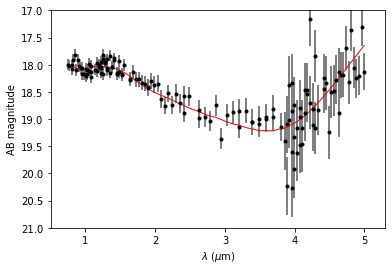

Season 1


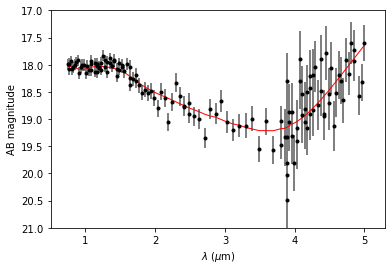

Season 2


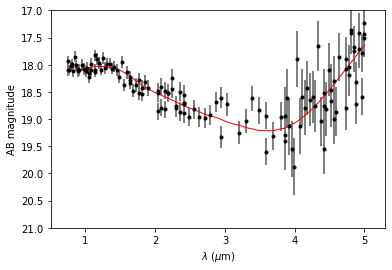

produced plots (shown above):
   ./output/Vedrana_Stype_D5km_r2.4AU-noVariability_rawSED_Season0.png
   ./output/Vedrana_Stype_D5km_r2.4AU-noVariability_rawSED_Season1.png
   ./output/Vedrana_Stype_D5km_r2.4AU-noVariability_rawSED_Season2.png
 and corresponding data files that have extension dat instead of png
 
 Each data file lists, for a single SPHEREx season, the following quantities:
 MJD wavelength magSPHEREx magUncertainty varOffset randomNoise
 the last two entries are added for convenience:
 the input noiseless model can be obtained as magTrue = mag - varOffset - randomNoise


In [14]:
LC['Ampl'] = 0.0
outfilerootname = outfilerootname + '-noVariability'
at.simSPHERExSpec(Dast, rAU, SEDfile, dataDIR, tax, LC, obsFile, ABrange, outfilerootname) 

### Reviewer's request: 
#### extend Fig. 9 to show different apparent brightness levels (instead of all 4 panels with V~18):
#### (new) Fig. 11: using object from the top left panel in Fig. 9, adjust its size so that the resulting
#### V-band brightness is 17, 18, 19 and 20.

In [51]:
## taxonomic types, heliocentric radii and albedos are hard-coded below
## however, the SNR at 2.4 micron can be varied (as well as plotting limits)
## see below for an example call
def showSEDexamples2(dD, mD, plotName, SNR=5, ABmin = 17, ABmax = 21):
    
    # this Dfac results in V~18 for SNR=5
    Dfac18 = np.sqrt(SNR/5)
    
    ## input choices for heliocentric radii and albedos
    rS, pS = 2.4, 0.25
    
    # S
    fNameS = 'SED_E0.90_T400_r'
    Vtarget = 17
    Dfac = Dfac18 * 10**(0.2*(18-Vtarget))
    wavSa, magTrueSa, magObsSa, mErrSa = at.getSEDwithNoise(dD, mD, Dfac*5,rS,fNameS,'S')
    labelS1a = 'S type, p$_V$=0.25, r=2.4 a.u.'
    labelS1b = 'D=8 km'

    # S
    fNameS = 'SED_E0.90_T400_r'
    Vtarget = 18
    Dfac = Dfac18 * 10**(0.2*(18-Vtarget))
    wavSb, magTrueSb, magObsSb, mErrSb = at.getSEDwithNoise(dD, mD, Dfac*5,rS,fNameS,'S')
    labelS2 = 'D=5 km'

    # S
    fNameS = 'SED_E0.90_T400_r'
    Vtarget = 19
    Dfac = Dfac18 * 10**(0.2*(18-Vtarget))
    wavSc, magTrueSc, magObsSc, mErrSc = at.getSEDwithNoise(dD, mD, Dfac*5,rS,fNameS,'S')
    labelS3 = 'D=3 km'

    # S
    fNameS = 'SED_E0.90_T400_r'
    Vtarget = 20
    Dfac = Dfac18 * 10**(0.2*(18-Vtarget))
    wavSd, magTrueSd, magObsSd, mErrSd = at.getSEDwithNoise(dD, mD, Dfac*5,rS,fNameS,'S')
    labelS4 = 'D=2 km'

    
    def doPanel(i, j, fig, wav, magTrue, magObs, mErr, ABmin, ABmax):
        ax = fig.add_subplot(2, 2, 2 * j + 1 + i)   
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1000))
        if (j<1):
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.xaxis.set_major_locator(plt.FixedLocator([1, 2, 3, 4, 5]))
            ax.set_xlabel('$\lambda$ ($\mu$m)', fontsize=15) 
        if (i!=0):
            ax.yaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.yaxis.set_major_locator(plt.FixedLocator([23, 22, 21, 20, 19, 18, 17, 16, 15, 14]))
            ax.set_ylabel('AB magnitude', fontsize=15)
                        
        # plotting        
        ax.plot(wav, magTrue, lw = 3, c='r')
        ax.errorbar(wav, magObs, mErr, fmt='.k', lw=2, ecolor='gray')
        ax.set_xlim(0.5, 5.3)
        ax.set_ylim(ABmax, ABmin)
        return ax
 
        
    ## actual plotting
    fig = plt.figure(figsize=(12, 9))
    fig.subplots_adjust(left=0.15, right=0.95, wspace=0.05,
                    bottom=0.2, top=0.95, hspace=0.05)
        
    ax = doPanel(0, 0, fig, wavSa, magTrueSa, magObsSa, mErrSa, ABmin, ABmax)
    ax.text(0.8, 20.1, labelS1a, fontsize=16)
    ax.text(0.8, 21.0, labelS1b, fontsize=14)

    ax = doPanel(1, 0, fig, wavSb, magTrueSb, magObsSb, mErrSb, ABmin, ABmax)
    ax.text(0.8, 21.0, labelS2, fontsize=14) 

    ax = doPanel(0, 1, fig, wavSc, magTrueSc, magObsSc, mErrSc, ABmin, ABmax)
    ax.text(0.8, 21.0, labelS3, fontsize=14) 

    ax = doPanel(1, 1, fig, wavSd, magTrueSd, magObsSd, mErrSd, ABmin, ABmax)
    ax.text(0.8, 17.0, labelS4, fontsize=14) 

    plt.savefig(plotName)
    plt.show()
    print('saved plot as:', plotName)   

    return

read in ./data//reflectivityS.dat
read in ./data//reflectivityS.dat
read in ./data//reflectivityS.dat
read in ./data//reflectivityS.dat


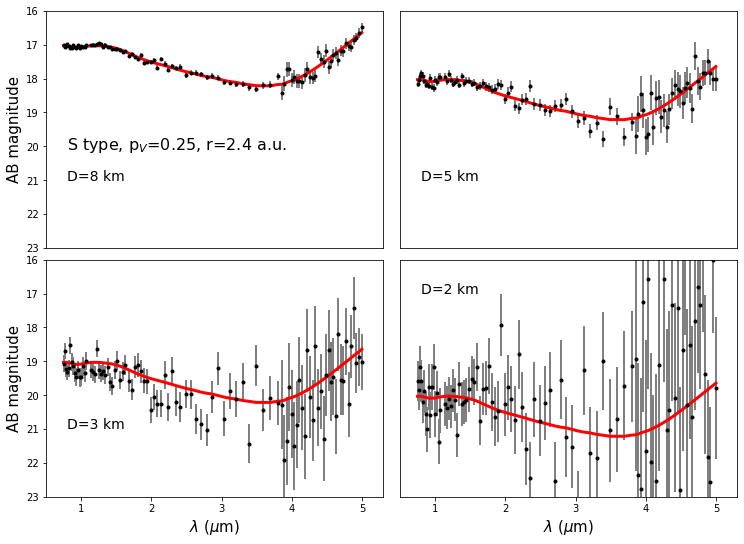

saved plot as: ./output/SPHERExSEDexamplesVaryingD.png


In [53]:
plotName = outputDIR + 'SPHERExSEDexamplesVaryingD.png'
showSEDexamples2(dataDIR, ATMDIR, plotName, SNR=5, ABmin = 16, ABmax = 23)